# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

# Sect4. Multi-variable linear regression

In [8]:
from images import bigpycraft_ai as bpc
from IPython.display import Image 
from tqdm import tqdm_notebook

<hr>
## <font color='brown'>Ex01. Multi-variable linear regression</font>

### Predictin exam score
> regression using three inputs (x1, x2, x3)

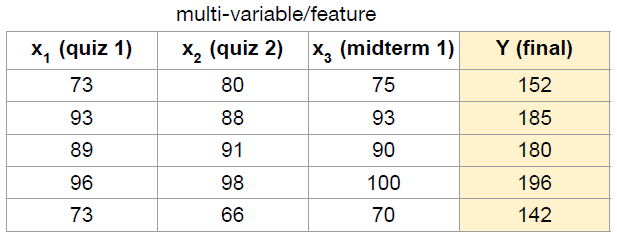

In [2]:
# Test Scores for General Psychology
bpc.Figure(bpc.ML04_IMG_01)

### Hypothesis
> 
<br>
$$ H(x) = Wx + b $$
<br>
$$ H(x1, x2, x3) = w1 x1 + w2 x2 + w3 x3 + b $$

### Cost function
> 
<br>
$$ H(x1, x2, x3) = w1 x1 + w2 x2 + w3 x3 + b $$
<br>
$$ cost(W,b) = \frac{1}{m} \sum^m_{i=1}(H(x1^{(i)}, x2^{(i)}, x3^{(i)} )-y^{(i)})^2 $$

In [3]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x1_data = [73., 93., 89.,  96., 73.]
x2_data = [80., 88., 91.,  98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y  = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b  = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b
print(hypothesis)

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


C:\Python\Anaconda3-50\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensor("add_2:0", dtype=float32)


In [4]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))

        

A Jupyter Widget


Step : 0 
Cost : 62547.2890625 
Prediction :
[-75.96345  -78.27629  -83.83015  -90.80436  -56.976482]

Step : 1 
Cost : 19614.837890625 
Prediction :
[21.697487 39.10213  31.826246 35.14237  32.553165]

Step : 2 
Cost : 6157.78662109375 
Prediction :
[ 76.37489  104.817566  96.5782   105.65545   82.676956]

Step : 3 
Cost : 1939.7125244140625 
Prediction :
[106.9874  141.6088  132.83064 145.13327 110.73886]

Step : 4 
Cost : 617.5654907226562 
Prediction :
[124.12685 162.2064  153.12724 167.23558 126.44912]

Step : 5 
Cost : 203.13729858398438 
Prediction :
[133.72324 173.73782 164.49077 179.61    135.24416]

Step : 6 
Cost : 73.23114013671875 
Prediction :
[139.09654 180.1934  170.85298 186.5381  140.1676 ]

Step : 7 
Cost : 32.50749206542969 
Prediction :
[142.10548 183.8072  174.41512 190.41704 142.92351]

Step : 8 
Cost : 19.737699508666992 
Prediction :
[143.79071 185.82999 176.40964 192.58882 144.46584]

Step : 9 
Cost : 15.729873657226562 
Prediction :
[144.73486 186.96207 177.

<hr>
## <font color='brown'>Ex02. Multi-variable matmul linear regression</font>

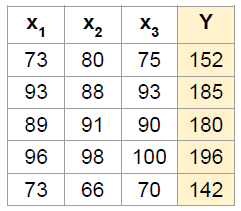

In [5]:
# Test Scores for General Psychology
bpc.Figure(bpc.ML04_IMG_02, 2**8)

### Hypothesis using matrix
> 
$$ w1 x1 + w2 x2 + w3 x3 + ... + wn xn $$
<br>
> 
$$
[x_{1}  x_{2}  x_{3}] \times
\begin{bmatrix}
    w_{1}\\
    w_{2}\\
    w_{3}
\end{bmatrix}
=
[x_1 w_1 + x_2 w_2 + x_3 w_3]
$$
<br>
> 
$$H(X) = XW$$


In [6]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x_data = [[73., 80., 75.], 
          [93., 88., 93.],
          [89., 91., 90.], 
          [96., 98., 100.], 
          [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]


# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


In [7]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))


A Jupyter Widget


Step : 0 
Cost : 126121.6015625 
Prediction :
[[-159.22546]
 [-197.2163 ]
 [-191.33363]
 [-208.02669]
 [-152.1618 ]]

Step : 1 
Cost : 39541.203125 
Prediction :
[[-20.541216]
 [-30.525648]
 [-27.091803]
 [-29.171347]
 [-25.018284]]

Step : 2 
Cost : 12402.845703125 
Prediction :
[[57.102417]
 [62.79873 ]
 [64.86099 ]
 [70.96306 ]
 [46.165253]]

Step : 3 
Cost : 3896.40625 
Prediction :
[[100.57165 ]
 [115.04803 ]
 [116.34181 ]
 [127.02448 ]
 [ 86.018845]]

Step : 4 
Cost : 1230.0838623046875 
Prediction :
[[124.90789]
 [144.3009 ]
 [145.16386]
 [158.41109]
 [108.33195]]

Step : 5 
Cost : 394.32940673828125 
Prediction :
[[138.53227]
 [160.67891]
 [161.30006]
 [175.98314]
 [120.82479]]

Step : 6 
Cost : 132.3600311279297 
Prediction :
[[146.15947]
 [169.84877]
 [170.33398]
 [185.82094]
 [127.81961]]

Step : 7 
Cost : 50.24222946166992 
Prediction :
[[150.42906]
 [174.98302]
 [175.39154]
 [191.32861]
 [131.7363 ]]

Step : 8 
Cost : 24.497928619384766 
Prediction :
[[152.8189 ]
 [177.85

<hr>
## <font color='brown'>Ex03. File input linear regression</font>

### Loading Data File

In [8]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('./data/data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print("x_data.shape : {}, \tlen(x_data) : {} \nx_data : \n{}".format(x_data.shape, len(x_data), x_data))
print("-"*25)
print("y_data.shape : {}  \ny_data : \n{}".format(y_data.shape, y_data))

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


x_data.shape : (25, 3), 	len(x_data) : 25 
x_data : 
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
-------------------------
y_data.shape : (25, 1)  
y_data : 
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [9]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))
        


Step : 0 
Cost : 20682.216796875 
Prediction :
[[15.3530855]
 [25.620491 ]
 [21.435873 ]
 [23.021599 ]
 [21.901628 ]
 [17.103834 ]
 [15.216542 ]
 [ 8.105922 ]
 [25.533789 ]
 [23.99665  ]
 [17.138174 ]
 [20.137476 ]
 [22.434807 ]
 [19.68472  ]
 [16.372953 ]
 [25.100708 ]
 [21.371382 ]
 [16.114529 ]
 [20.338524 ]
 [17.508432 ]
 [18.731852 ]
 [23.45593  ]
 [17.350943 ]
 [16.195797 ]
 [25.42364  ]]

Step : 1 
Cost : 7661.43017578125 
Prediction :
[[68.32281 ]
 [89.28384 ]
 [84.165085]
 [91.338844]
 [70.45464 ]
 [52.900417]
 [66.35534 ]
 [46.018482]
 [85.03186 ]
 [79.10705 ]
 [66.40696 ]
 [68.71708 ]
 [87.24234 ]
 [73.55812 ]
 [67.74665 ]
 [89.70451 ]
 [72.67783 ]
 [77.48663 ]
 [82.12339 ]
 [72.79138 ]
 [78.69987 ]
 [83.181145]
 [74.525734]
 [69.60098 ]
 [91.40337 ]]

Step : 2 
Cost : 2847.277587890625 
Prediction :
[[100.53139 ]
 [127.994156]
 [122.30769 ]
 [132.87944 ]
 [ 99.9769  ]
 [ 74.66642 ]
 [ 97.45092 ]
 [ 69.07227 ]
 [121.20958 ]
 [112.61717 ]
 [ 96.36511 ]
 [ 98.255974]
 [126.64

 [192.87552]]

Step : 1300 
Cost : 15.094025611877441 
Prediction :
[[151.09898 ]
 [187.09114 ]
 [181.36497 ]
 [197.6614  ]
 [144.247   ]
 [107.8247  ]
 [147.10469 ]
 [107.557106]
 [176.61723 ]
 [164.81403 ]
 [143.22592 ]
 [143.89812 ]
 [187.15527 ]
 [155.83395 ]
 [148.66734 ]
 [189.55498 ]
 [149.9473  ]
 [175.07808 ]
 [177.56108 ]
 [158.45193 ]
 [172.98457 ]
 [175.4998  ]
 [164.42857 ]
 [151.89307 ]
 [192.81294 ]]

Step : 1400 
Cost : 14.664348602294922 
Prediction :
[[151.14029 ]
 [187.02838 ]
 [181.35873 ]
 [197.68327 ]
 [144.14752 ]
 [107.78246 ]
 [147.19525 ]
 [107.731285]
 [176.56755 ]
 [164.82135 ]
 [143.25018 ]
 [143.88345 ]
 [187.11731 ]
 [155.7536  ]
 [148.7447  ]
 [189.52908 ]
 [149.80098 ]
 [175.23099 ]
 [177.53763 ]
 [158.44832 ]
 [173.06444 ]
 [175.4762  ]
 [164.50604 ]
 [151.86246 ]
 [192.75195 ]]

Step : 1500 
Cost : 14.25606918334961 
Prediction :
[[151.18088]
 [186.96709]
 [181.35278]
 [197.70462]
 [144.0504 ]
 [107.7409 ]
 [147.28351]
 [107.90099]
 [176.51869]
 [164.

In [10]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        # print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))
        print("Step : {} \tCost : {} ".format(step, cost_val))
        

A Jupyter Widget

Step : 0 	Cost : 20682.216796875 
Step : 1 	Cost : 7661.43017578125 
Step : 2 	Cost : 2847.277587890625 
Step : 3 	Cost : 1067.34716796875 
Step : 4 	Cost : 409.25250244140625 
Step : 5 	Cost : 165.9315185546875 
Step : 6 	Cost : 75.96328735351562 
Step : 7 	Cost : 42.6942138671875 
Step : 8 	Cost : 30.388269424438477 
Step : 9 	Cost : 25.833053588867188 
Step : 100 	Cost : 22.404691696166992 
Step : 200 	Cost : 21.608549118041992 
Step : 300 	Cost : 20.8525447845459 
Step : 400 	Cost : 20.134559631347656 
Step : 500 	Cost : 19.452693939208984 
Step : 600 	Cost : 18.805055618286133 
Step : 700 	Cost : 18.18989372253418 
Step : 800 	Cost : 17.605554580688477 
Step : 900 	Cost : 17.050495147705078 
Step : 1000 	Cost : 16.52317237854004 
Step : 1100 	Cost : 16.0222110748291 
Step : 1200 	Cost : 15.546247482299805 
Step : 1300 	Cost : 15.094025611877441 
Step : 1400 	Cost : 14.664348602294922 
Step : 1500 	Cost : 14.25606918334961 
Step : 1600 	Cost : 13.868073463439941 
Step : 1700 	Cost 

### prediction

In [11]:
# Ask score
print("Your score \t: \n", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

Your score 	: 
 [[194.89839]]


In [12]:
# Ask score many
print("\nOther scores \t: \n", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))



Other scores 	: 
 [[165.0794 ]
 [176.52182]]


<hr>
## <font color='brown'>Ex04. TF reader linear regression 5</font>
> 
- 참조 : https://www.tensorflow.org/programmers_guide/reading_data

In [11]:
? reader.read(filename_queue)

In [2]:
? tf.decode_csv(value, record_defaults=record_defaults)


In [5]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

filename_queue = tf.train.string_input_producer(
    ['./data/data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the decoded result.
# Convert CSV records to tensors. Each column maps to one tensor.
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

# collect batches of csv in
train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


In [6]:
train_x_batch

<tf.Tensor 'batch_1:0' shape=(10, 3) dtype=float32>

In [9]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

Step_val = []
Cost_val = []

for step in tqdm_notebook(range(2001)):

    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch})
    

    Step_val.append(step)
    Cost_val.append(cost_val)
    
    if step % 100 == 0 or step < 10 :
        print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))

coord.request_stop()
coord.join(threads)


A Jupyter Widget


Step : 0 
Cost : 9890.5546875 
Prediction :
[[54.484478]
 [70.104065]
 [66.80272 ]
 [73.2304  ]
 [53.893906]
 [40.363327]
 [53.72946 ]
 [38.32759 ]
 [66.8343  ]
 [62.931923]]

Step : 1 
Cost : 4281.99853515625 
Prediction :
[[ 85.62771 ]
 [ 86.46018 ]
 [112.15943 ]
 [ 92.77533 ]
 [ 89.06199 ]
 [114.34623 ]
 [ 89.207855]
 [105.08297 ]
 [106.13247 ]
 [ 94.39601 ]]

Step : 2 
Cost : 1802.617919921875 
Prediction :
[[131.28638 ]
 [132.98105 ]
 [124.63512 ]
 [114.39664 ]
 [146.16191 ]
 [114.112114]
 [141.78806 ]
 [137.42496 ]
 [150.14784 ]
 [108.56518 ]]

Step : 3 
Cost : 383.6379699707031 
Prediction :
[[ 91.81142]
 [127.21303]
 [ 92.80507]
 [152.34203]
 [142.14128]
 [123.44297]
 [123.73614]
 [161.9164 ]
 [134.1447 ]
 [128.48878]]

Step : 4 
Cost : 331.0302429199219 
Prediction :
[[171.8573 ]
 [134.89659]
 [159.72104]
 [161.14908]
 [143.62366]
 [157.29993]
 [158.88948]
 [149.43657]
 [137.55902]
 [174.78195]]

Step : 5 
Cost : 61.8369026184082 
Prediction :
[[143.98029 ]
 [177.6834  ]
 [17

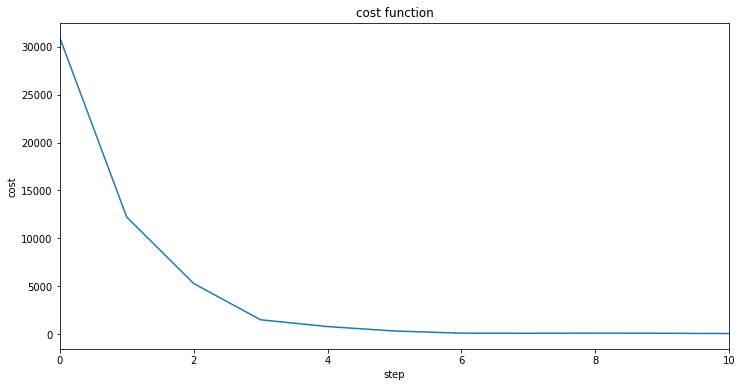

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,6]

# Show the cost function
plt.plot(Step_val, Cost_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('cost')
plt.xlim(0,10)
plt.show()

### prediction

In [16]:
# Ask score
print("Your score \t: \n", sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

Your score 	: 
 [[180.75392]]


In [17]:
# Ask score many
print("\nOther scores \t: \n", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))


Other scores 	: 
 [[155.70262]
 [185.67659]]


<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>